In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import swifter
import json
import numpy as np 
from google.cloud import bigquery
from google.oauth2 import service_account

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')
import matplotlib.pylab as pylab
import matplotlib.dates as dates

In [3]:
df_liwc_tweets = pd.read_csv('LIWC_topics_all_tweets_updated.csv')
df_liwc_dropped = df_liwc_tweets.drop(['Topic_Perc_Contrib', 'compound', 'id', 'id_str', 'neg', 'neu', 'pos','full_text'],axis=1)

pivoted_df = pd.pivot_table(df_liwc_dropped, index= 'date', columns= 'Dominant_Topic', aggfunc = 'sum')

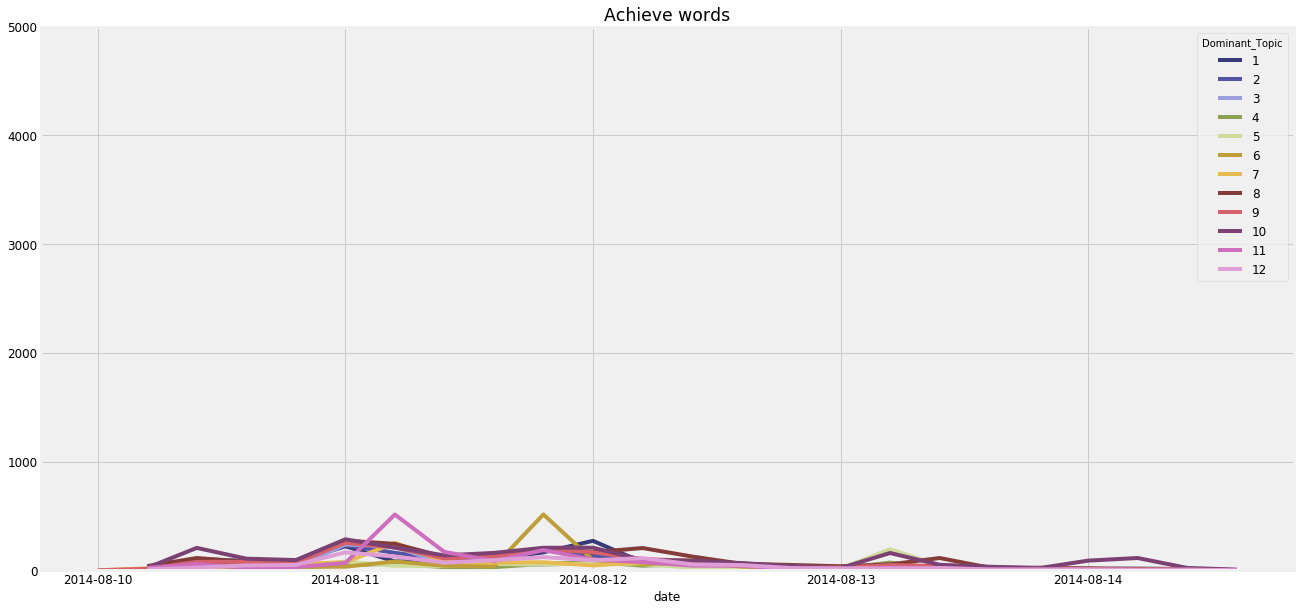

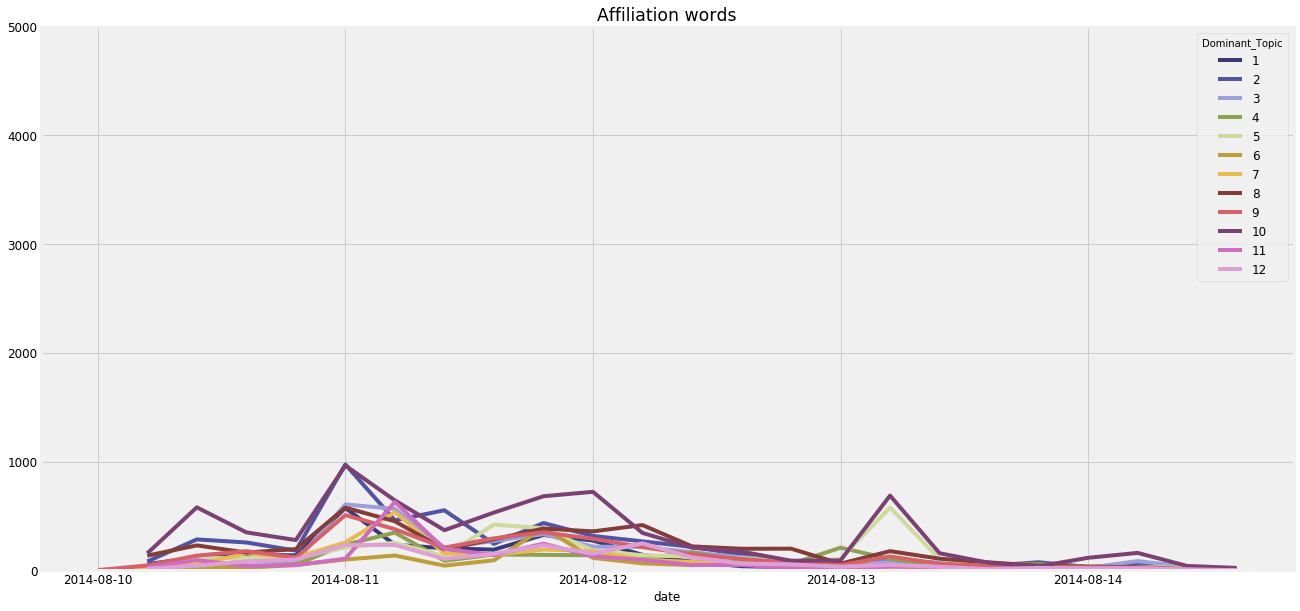

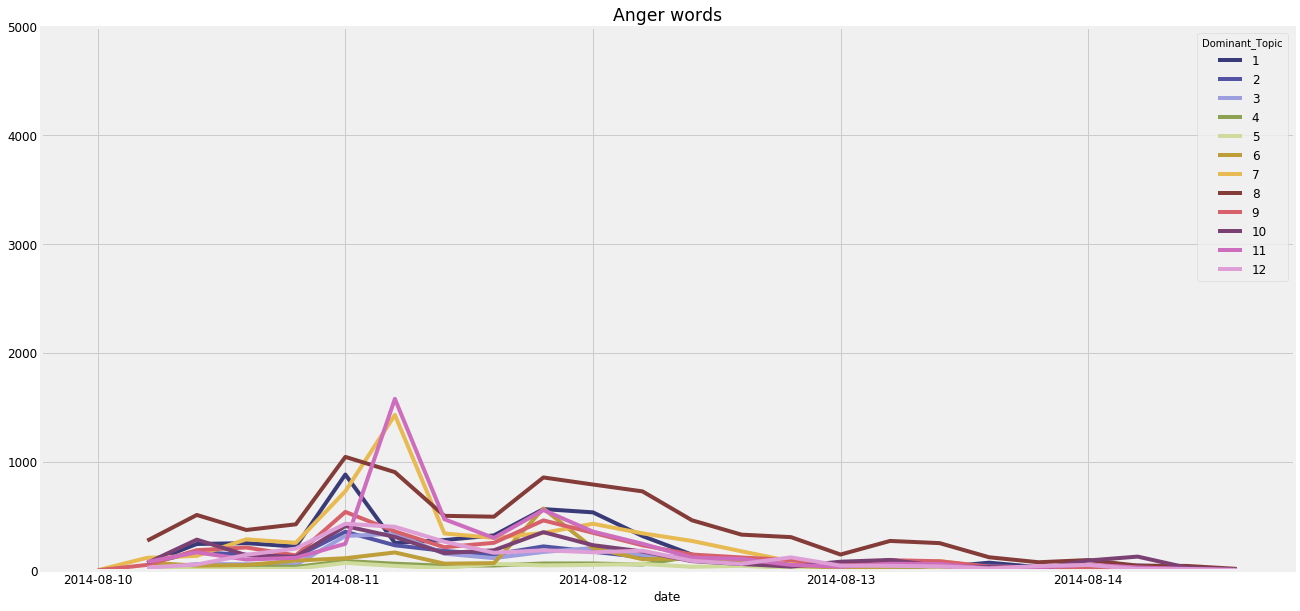

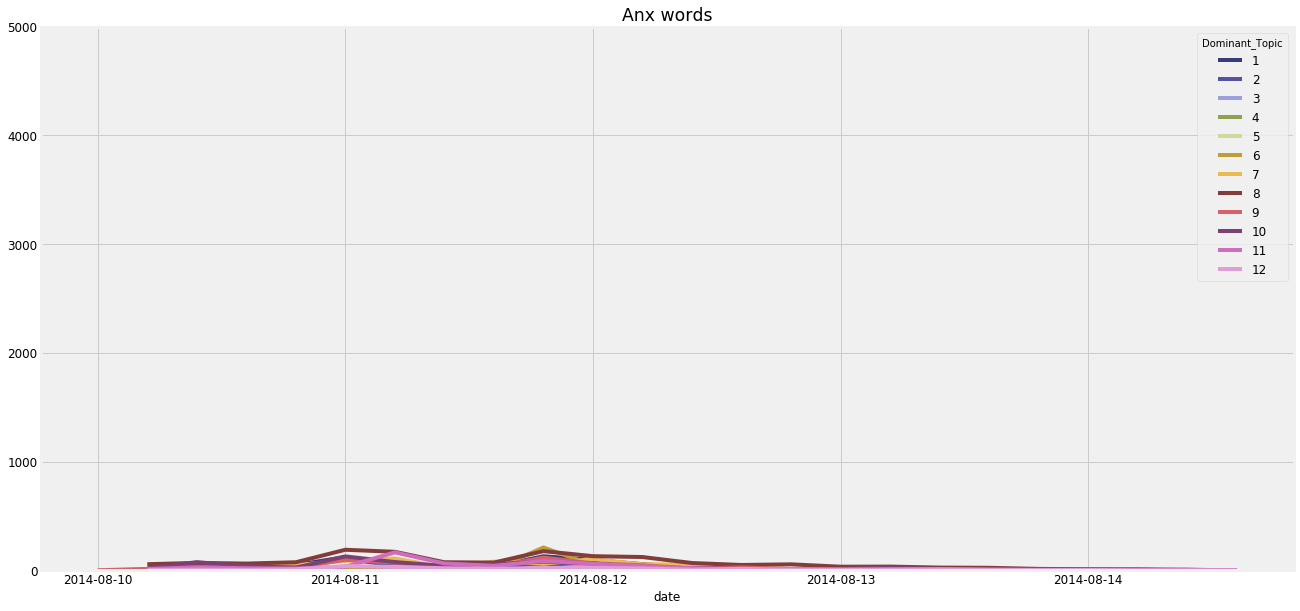

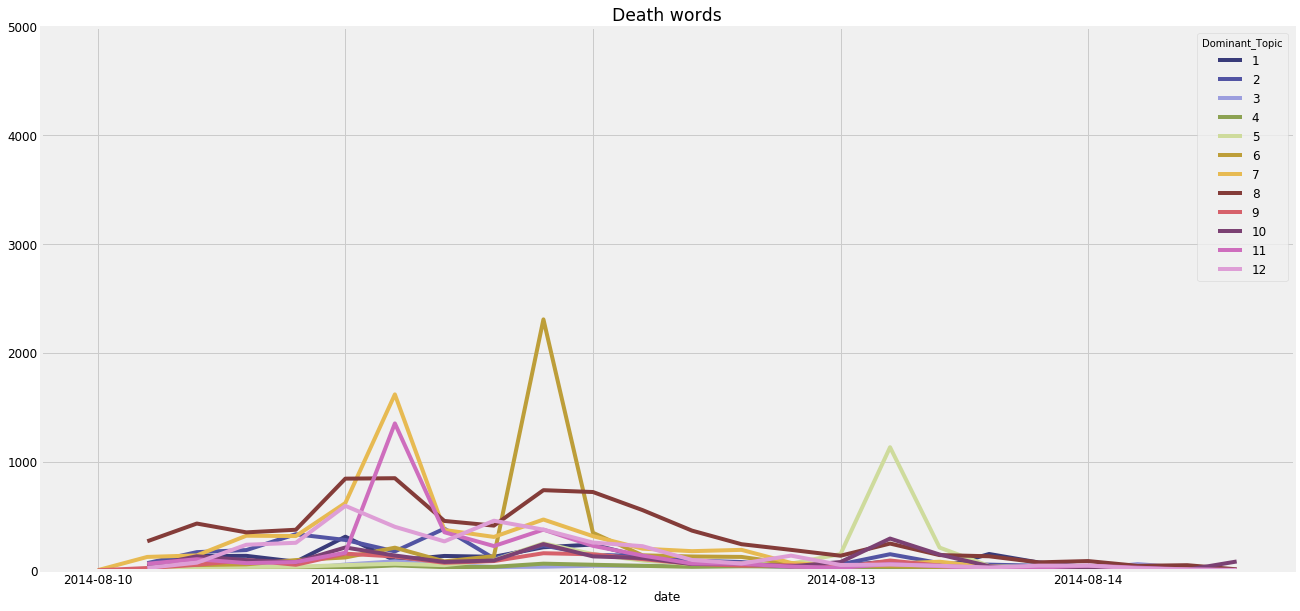

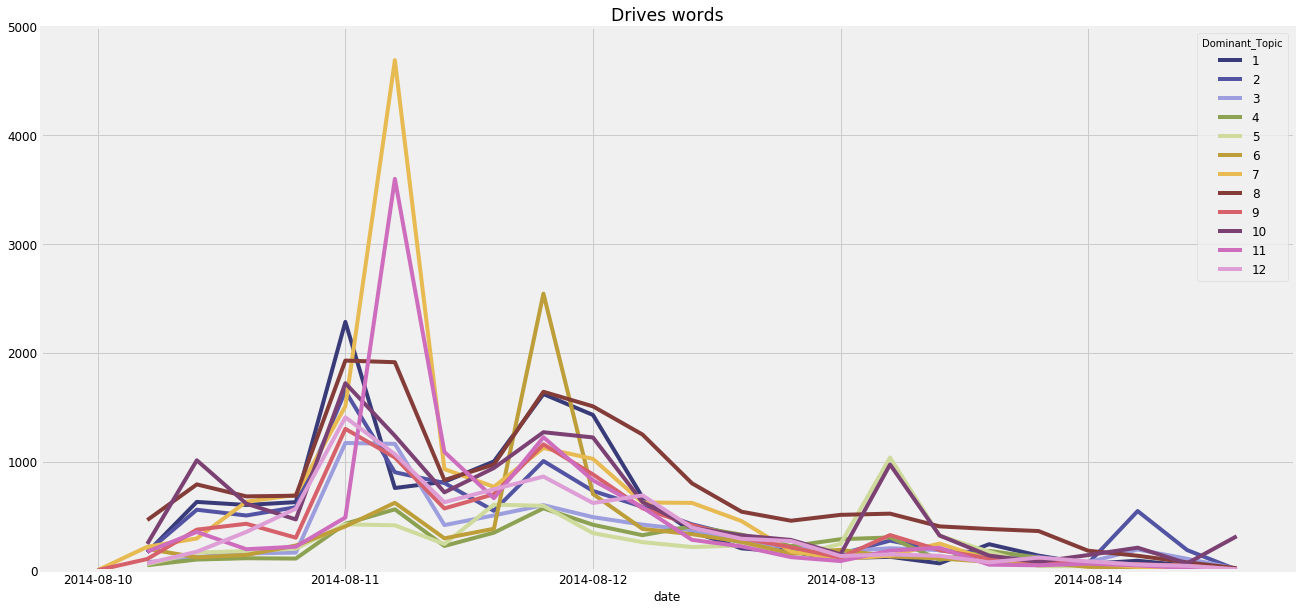

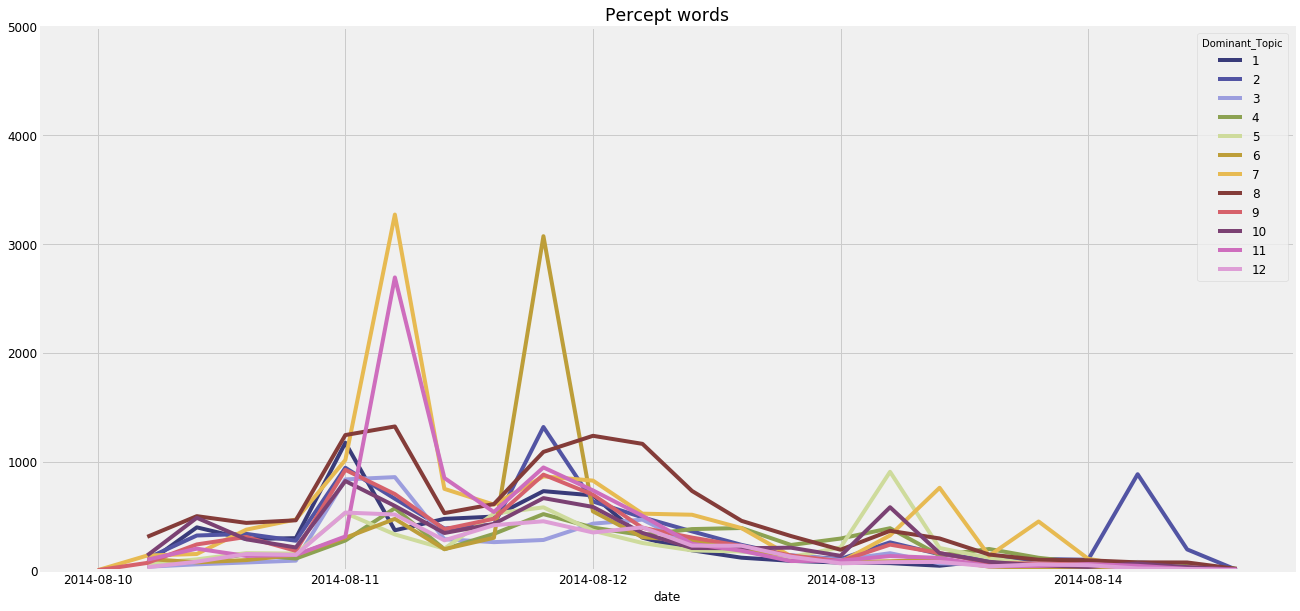

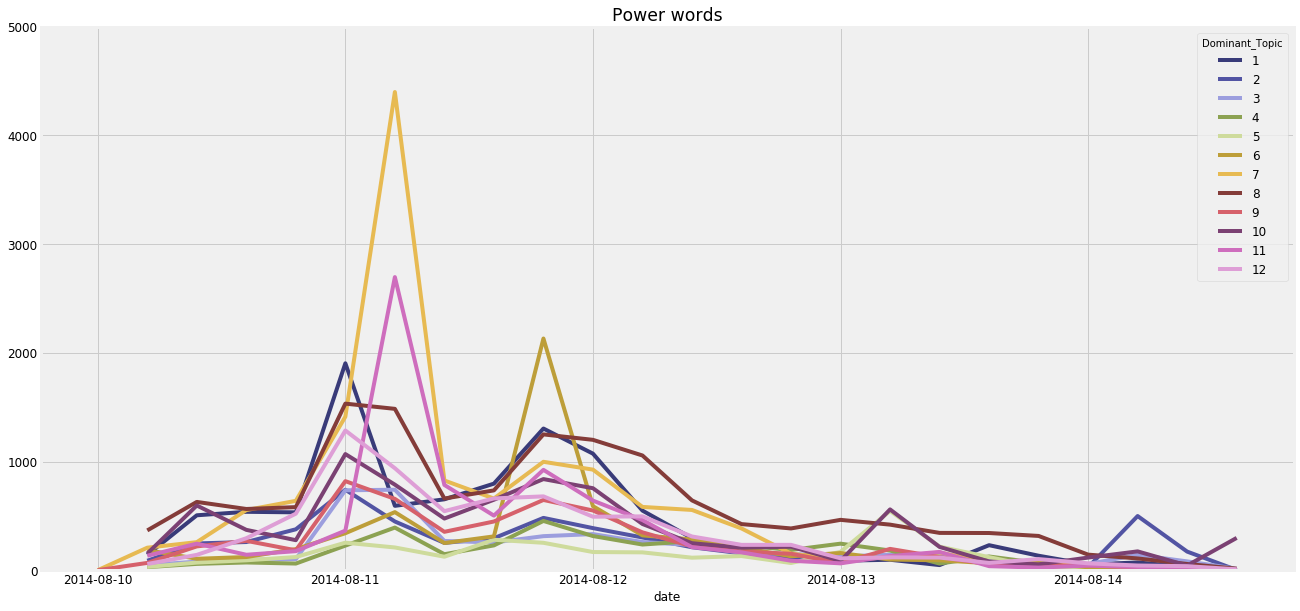

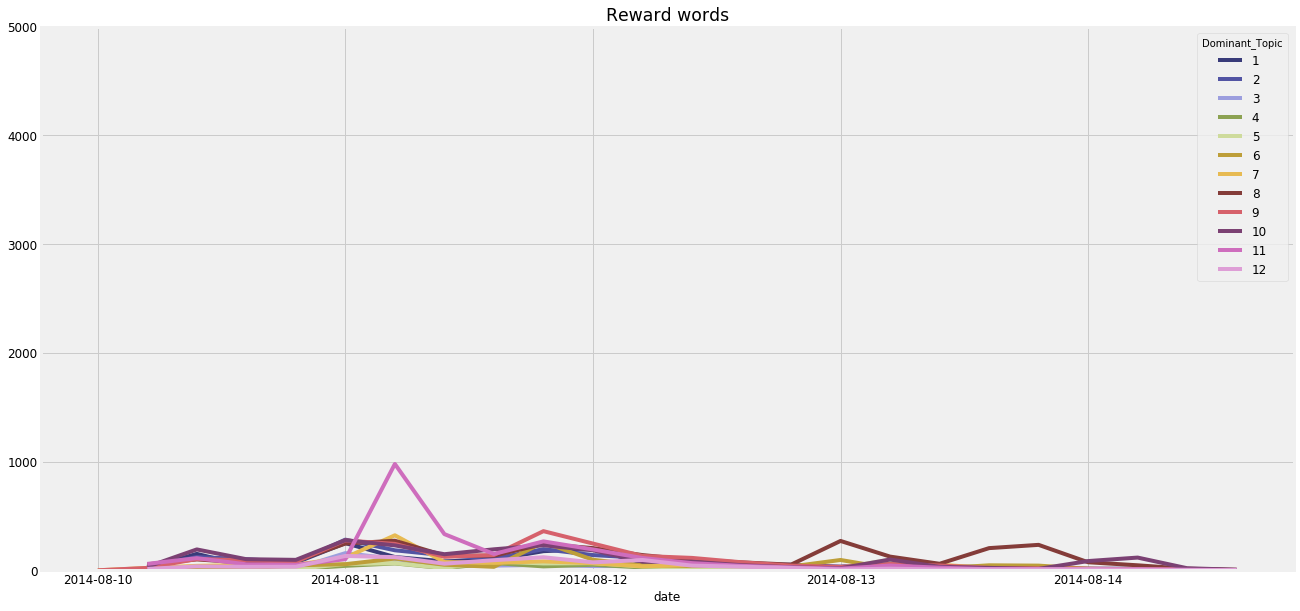

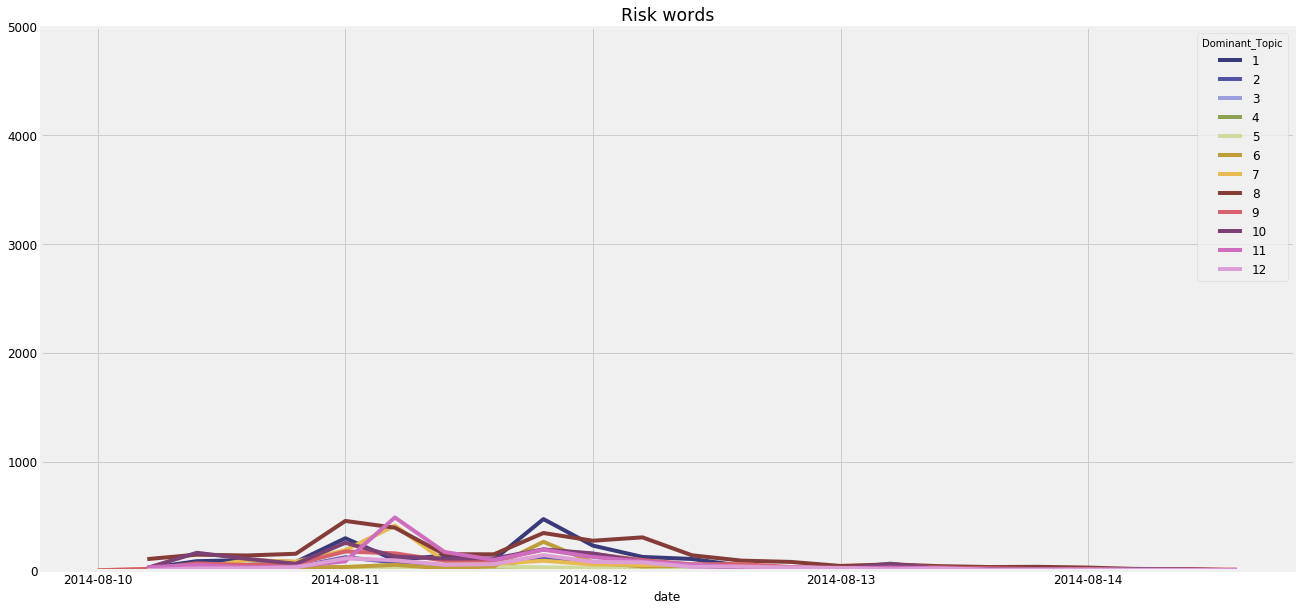

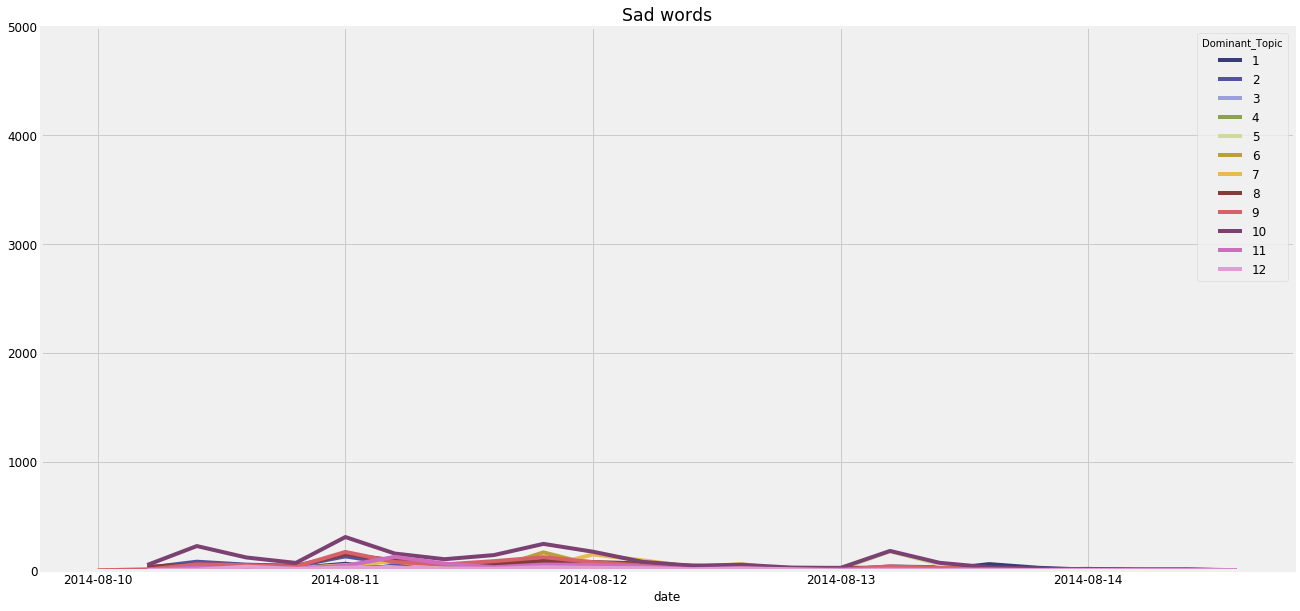

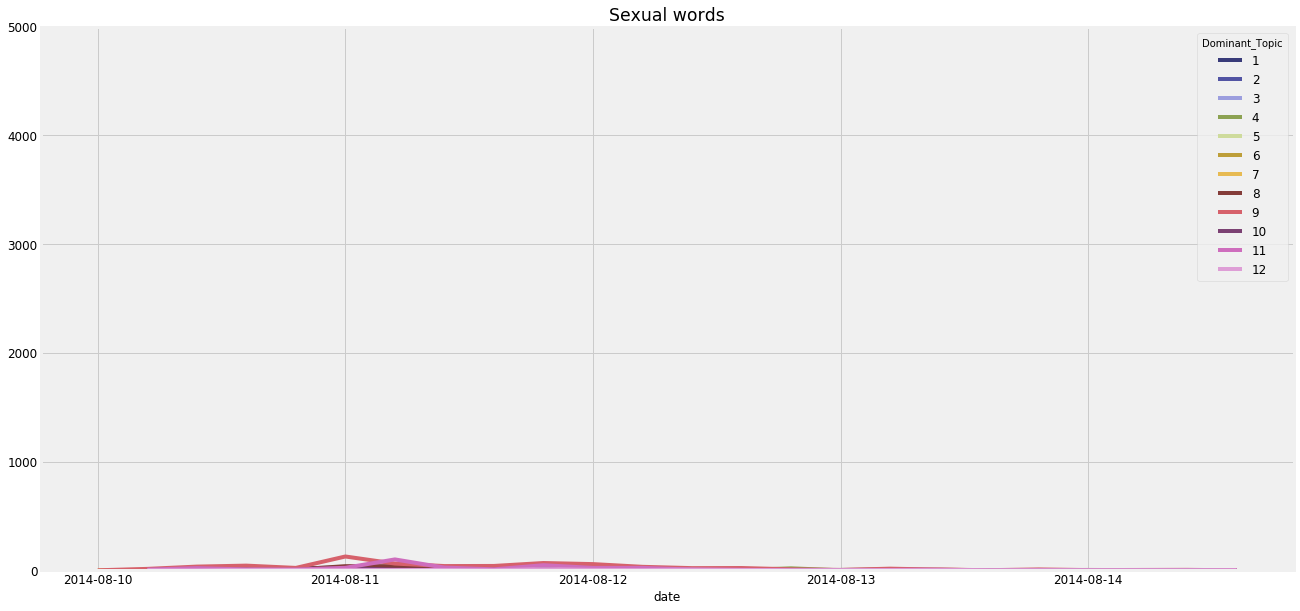

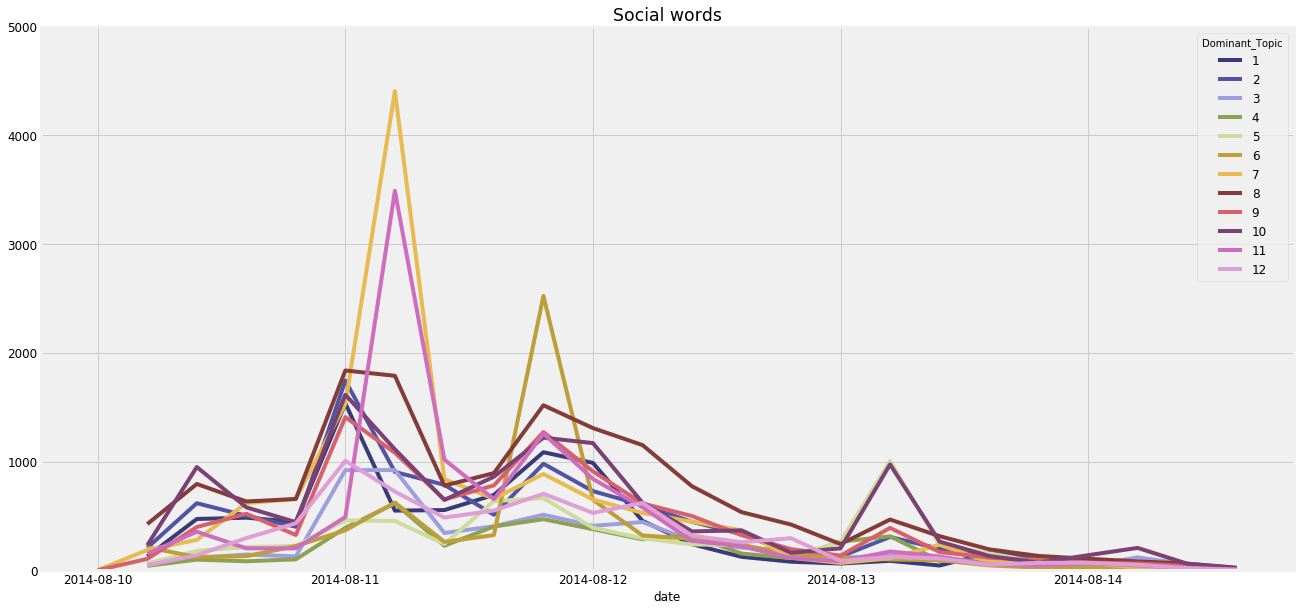

In [83]:
params = {'legend.fontsize': 'large',
#           'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
for i in pivoted_df.columns.levels[0]:
    pivoted_df[i].plot(figsize=(20,10), colormap='tab20b', grid=True, x_compat=True)
    plt.gca().set_xticklabels(pivoted_df.index.values)
    plt.title('%s'%i.replace('_', ' '))
    plt.ylim(0,5000)

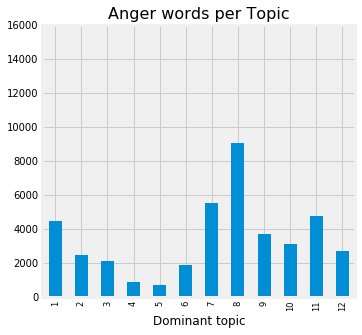

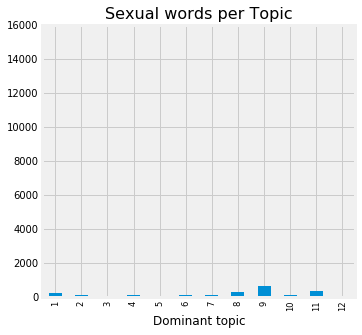

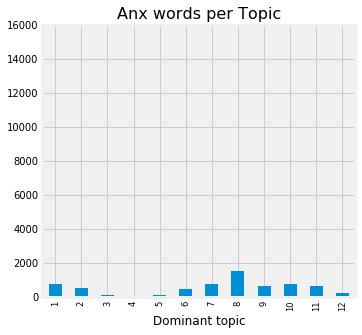

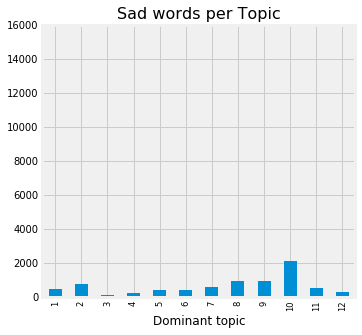

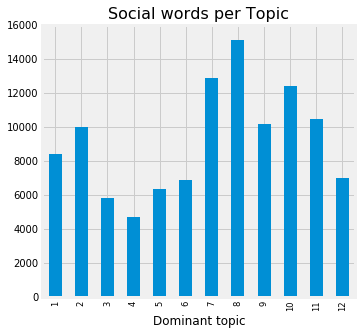

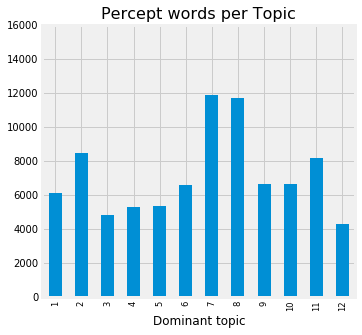

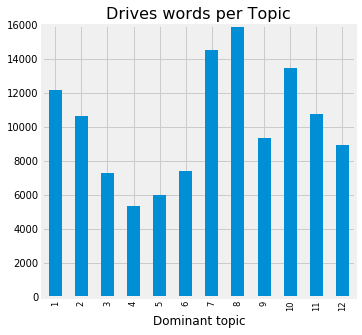

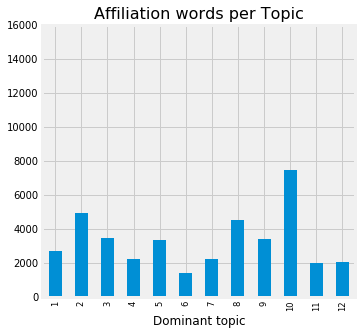

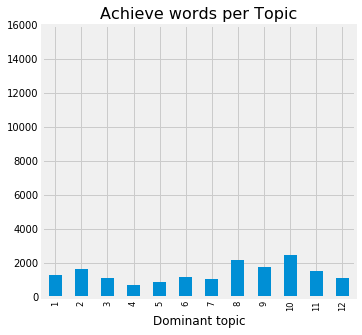

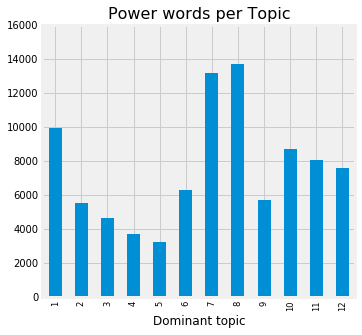

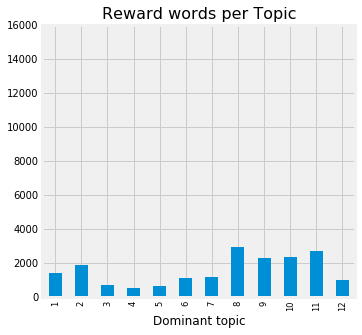

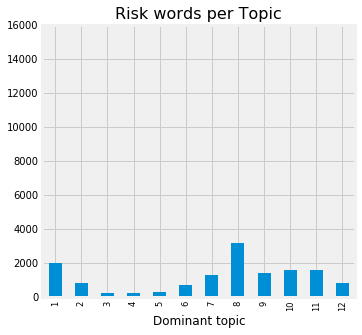

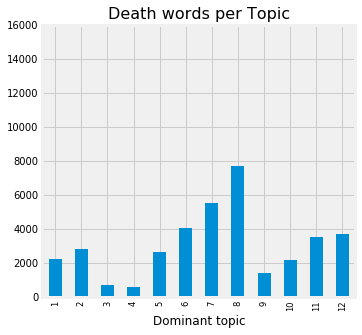

In [84]:
params = {'legend.fontsize': 'x-small',
#           'figure.figsize': (15, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'xx-small'}
pylab.rcParams.update(params)
for i in df_keys:
    df_liwc_tweets.groupby('Dominant_Topic')[['%s'%i]].agg('sum').plot.bar(figsize=(5,5), legend=False)
    plt.ylim(0,16000)
    plt.yticks(fontsize=10)
    plt.title('%s per Topic'%i.replace('_',' '), fontsize=16)
    plt.xlabel('Dominant topic', fontsize=12)


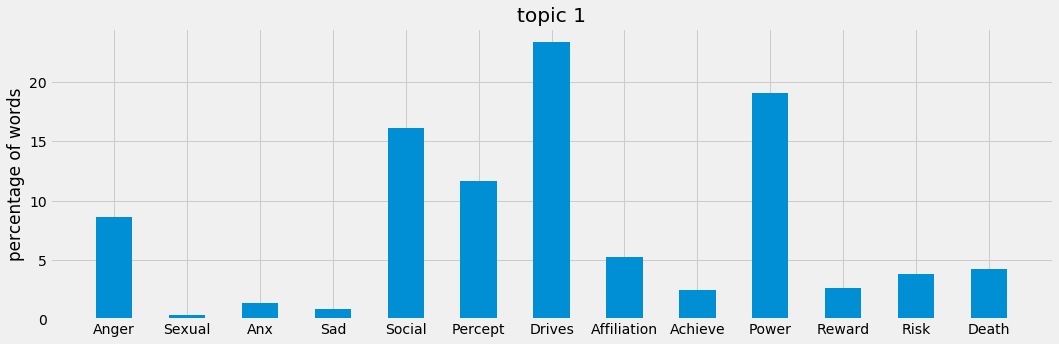

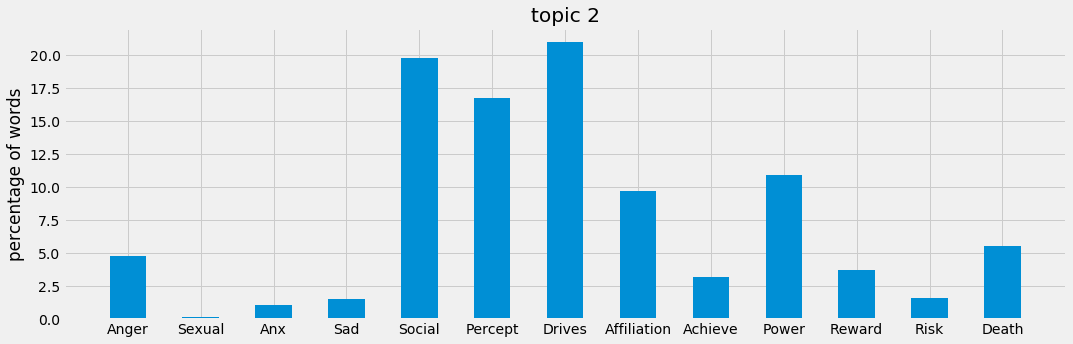

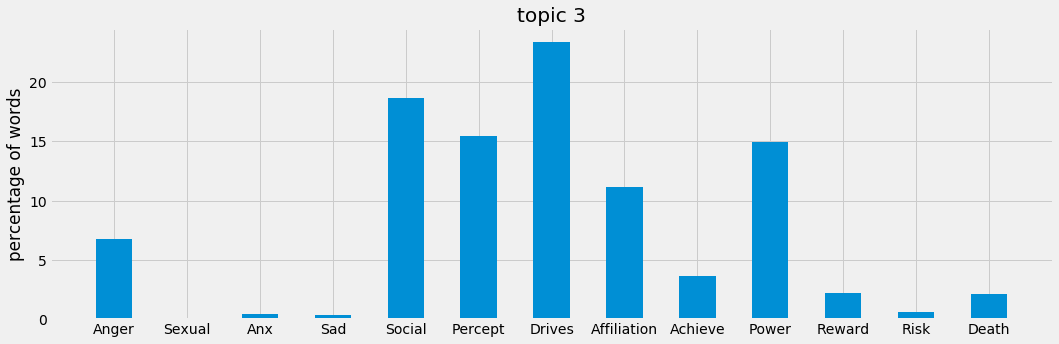

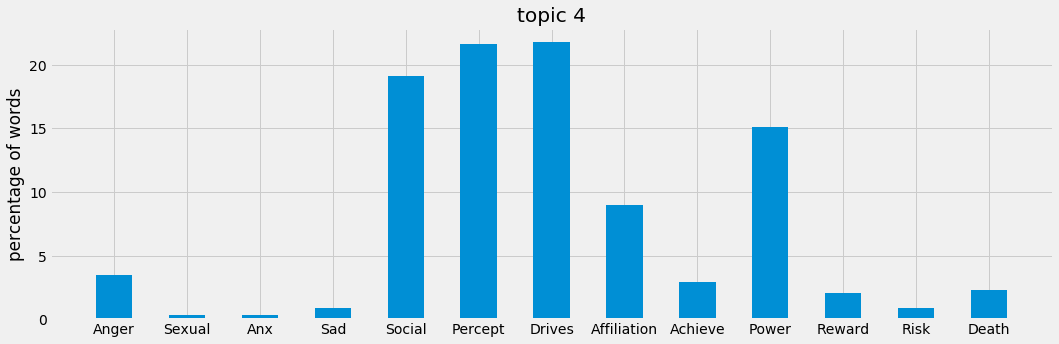

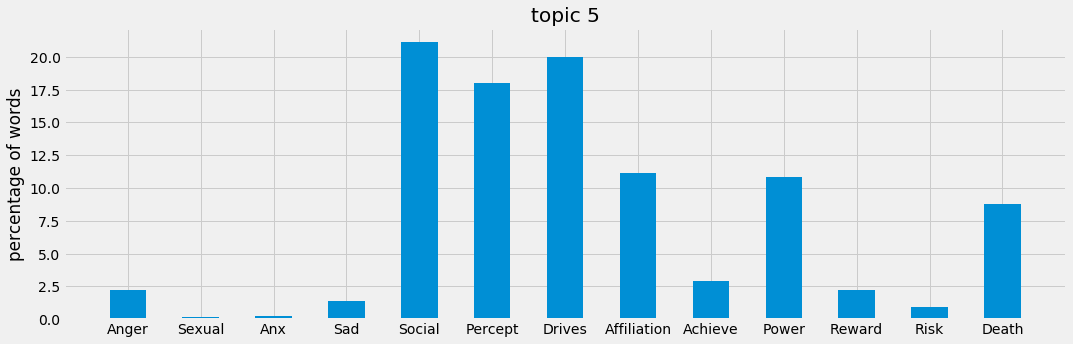

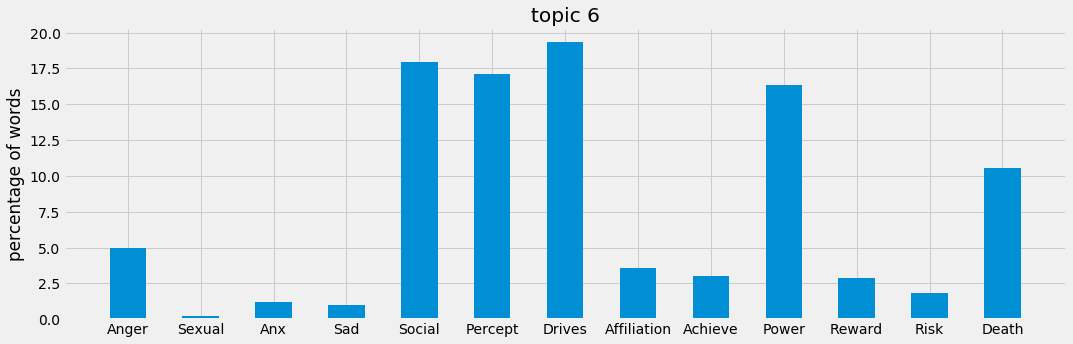

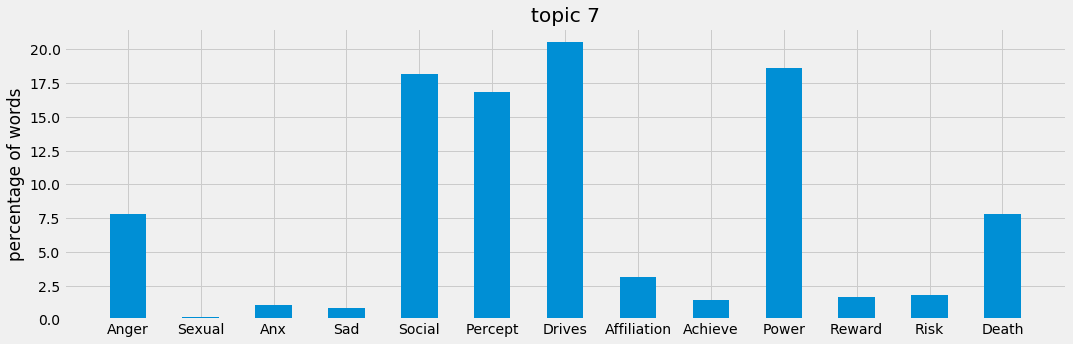

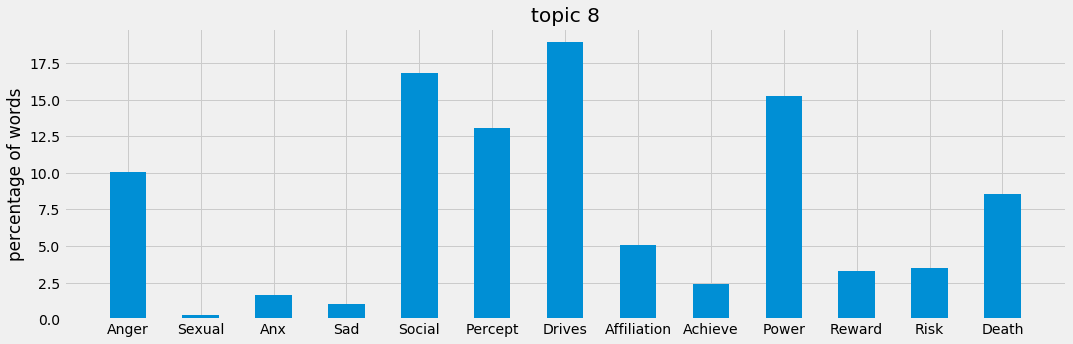

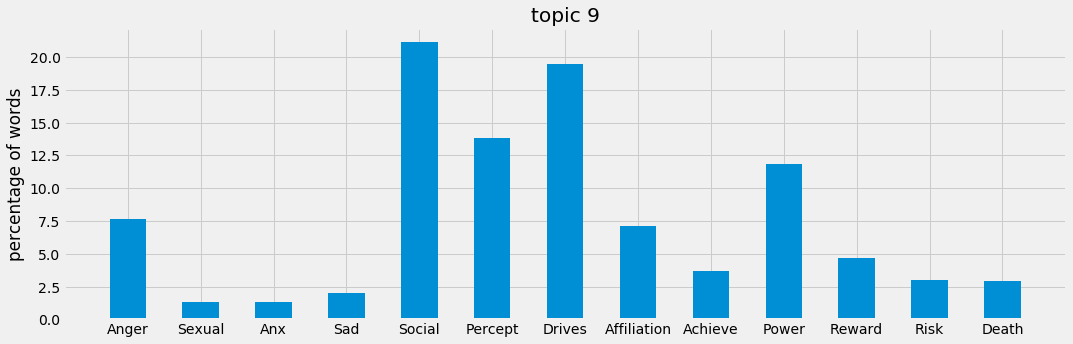

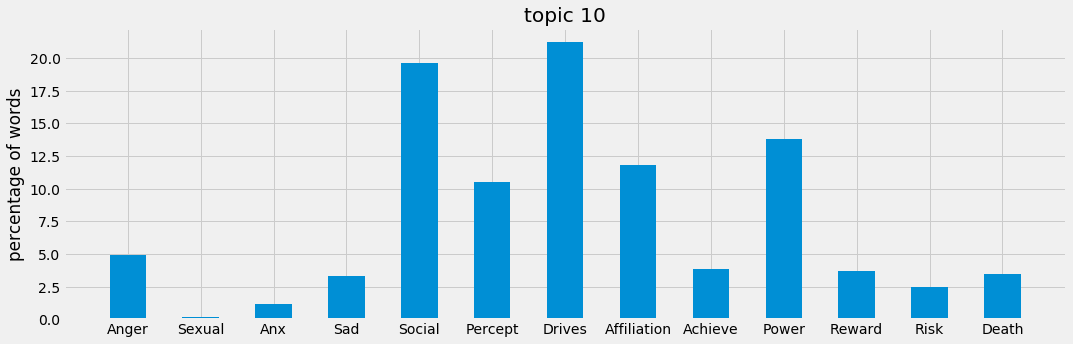

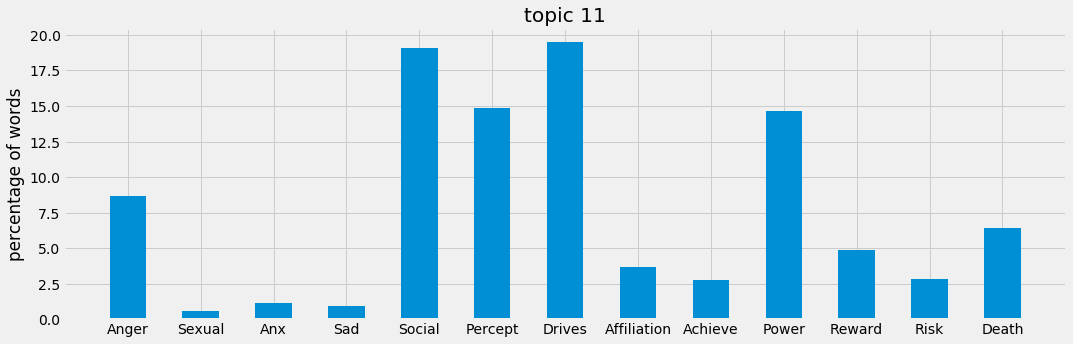

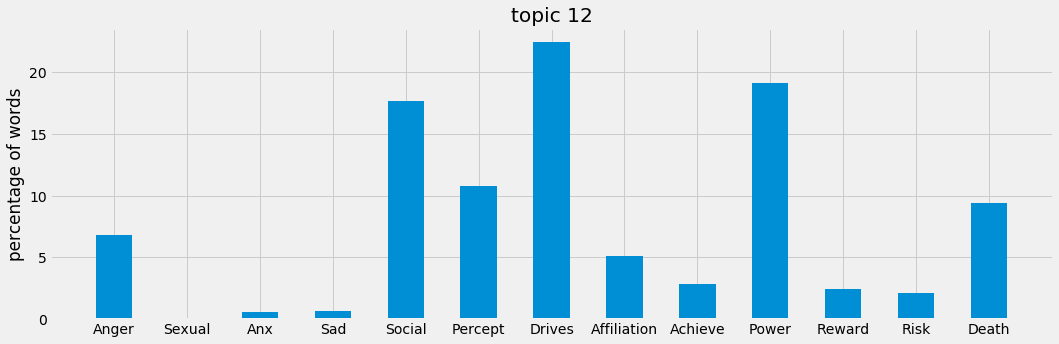

In [11]:
for topic in sorted(df_liwc_tweets['Dominant_Topic'].unique().tolist()):
    key_names = [i.split('_')[0] for i in df_keys]
    sums =[]
    for i in df_keys:
        s = df_liwc_tweets[df_liwc_tweets['Dominant_Topic']==topic][str(i)].sum()
        sums.append(s)
    percs = sums/np.sum(sums)*100
    plt.figure()
    plt.bar(x=key_names, height=percs, width=0.5)
    plt.rcParams["figure.figsize"] = (16,5)
    plt.ylabel('percentage of words')
    plt.title('topic %s'%topic)
    

Note ** The percentages are calculated assuming the categories specified as keys are the only categories present in tweets.